### About HOG

* The histogram of oriented gradients (HOG) is a feature descriptor used in computer vision and image processing for the purpose of object detection. The technique counts occurrences of gradient orientation in localized portions of an image.

&nbsp;

&nbsp;

### HOG Step-by-Step :

* ![title](images/hog.png)
* The image size should preferably be 64 x 128. This is because we will be dividing the image into 8*8.
* The first step in HOG detection is to divide the source image into blocks (for example 16×16 pixels). Each block is divided by small regions, called cells (for example 8×8 pixels).
* We take the 64 gradient vectors (in our 8x8 pixel cell) and put them into a 9-bin histogram. The Histogram ranges from 0 to 180 degrees, so there are 20 degrees per bin.
* The gradient of this patch contains 2 values (magnitude and direction) per pixel. i.e., gradient (magnitude) and the orientation (direction).
* A gradient vector can be computed for every pixel an image. It’s simply a measure of the change in pixel values along the x-direction and the y-direction around each pixel.
* ![title](images/hog1.png)
* ![title](images/hog2.png)
* ![title](images/hog3.png)
* Gradient Vector Applications :
> * The first and most obvious application of gradient vectors is to edge detection. <span style='background:yellow'>You can see in the gradient images how large gradient values correspond to strong edges in the image.</span>
* <span style='background:yellow'>So, HOG mainly concentrates on the strong(orientation i.e., angles values) on the edges of the object in image, where in the background of object there is no x/y difference due to same pixel values, hence magnitude/orientation get high values at the edges of object in image only, due to difference between object edge pixel value and neighbour background pixel value. This is how HOG detects the object in the image.</span> 
&nbsp;
&nbsp;
&nbsp;
&nbsp;
#### Generating histograms per cell :
* ![title](images/hog4.png)
* Above matrix is an example of cell in a block, where we are getting orientation/magnitude values of each pixel through their x & y directions pixel value change. 
* Hence the resultant gradients in the x and y direction for this pixel are:
> * Change in X direction(Gx) = 89 – 78 = 11
> * Change in Y direction(Gy) = 68 – 56 = 8
> * <span style='background:yellow'>The magnitude would be higher when there is a sharp change in intensity, such as around the edges.</span>
* Hence, the value of the angle would be:
> * Φ = atan(Gy / Gx)
> * The orientation comes out to be 36 when we plug in the values. 
* Here is the process for the highlighted pixel (85). Since the orientation for this pixel is 36, we will add a number against angle value 36, denoting the frequency:
* ![title](images/hog5.png)
* Again, for each pixel, we will check the orientation, and store the frequency of the orientation values in the form of a 9 x 1 matrix(becuase possible angles from 0 - 180° making 9 bins(each 20° difference)i.e., 9*20=180). Plotting this would give us the histogram:
&nbsp;
&nbsp;
&nbsp;
&nbsp;
#### Generating Final Features(Histogram Features 9 bins values. i.e., 9*20=180) per whole Image :
* ![title](images/hog6.png)
* One block is 16x16 cell size(which has 2 cells in x_axis and 2 cells in y_axis & each cell is 8x8 size pixel) i.e., 8x2 = 16 block size. 
* Per each 8x8 cell size, we get 9x1 matrix histogram feature values, as we have 4 cells in one block(i.e., 9*4= 36x1 histogram features).
* We can have 105 (7×15) blocks of 16×16 of tota image, so total histogram features for the image would be 105 x 36×1 = 3780 histogram features.
* We normalise block wise histogram features(i.e., 36x1, to handle uneven intensities of light in some portions) and get total final histogram from all blocks histograms.

&nbsp;

&nbsp;

### Importing Libraries

In [2]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
from skimage import data, io, filters, color
%matplotlib inline

&nbsp;

&nbsp;

### Sample Images

In [9]:
forest1 = "/Users/rock/Data Science/Practice/images/forest1.jpeg"
forest2 = "/Users/rock/Data Science/Practice/images/forest2.jpeg"
forest3 = "/Users/rock/Data Science/Practice/images/forest3.jpeg"
chair = "/Users/rock/Data Science/Practice/images/chair.jpeg"
cat = "/Users/rock/Data Science/Practice/images/cat.jpeg"

i_forest1 = io.imread(fname = forest1)
i_forest2 = io.imread(fname = forest2)
i_forest3 = io.imread(fname = forest3)
i_chair = io.imread(fname = chair)
i_cat = io.imread(fname = cat)

image = i_chair

&nbsp;

&nbsp;

### Applying HOG algorithm

In [18]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
print(fd.shape)
fd

(6528,)


array([0.20910742, 0.02638849, 0.03344158, ..., 0.06415707, 0.32511   ,
       0.19728495])

#### Key Note :
* Before going ahead, let me give you a basic idea of what each of these hyperparameters represents. Alternatively, you can check the definitions from the official documentation here.

* The orientations are the number of buckets we want to create. Since I want to have a 9 x 1 matrix, I will set the orientations to 9 pixels_per_cell defines the size of the cell for which we create the histograms. In the example we covered in this article, we used 8 x 8 cells and here I will set the same value. As mentioned previously, you can choose to change this value
* We have another hyperparameter cells_per_block which is the size of the block over which we normalize the histogram. 
* Here, we mention the cells per blocks and not the number of pixels. So, instead of writing 16 x 16, we will use 2 x 2 here
* The feature matrix from the function is stored in the variable fd, and the image is stored in hog_image. Let us check the shape of the feature matrix.

&nbsp;

&nbsp;

### Visualization of HOG image(object detection)

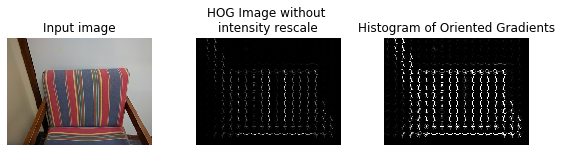

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('HOG Image without \nintensity rescale')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax3.axis('off')
ax3.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax3.set_title('Histogram of Oriented Gradients')

plt.tight_layout()
plt.show()